In [212]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [213]:
df_goo = pd.read_csv("./GOOG.csv")
df_goo

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


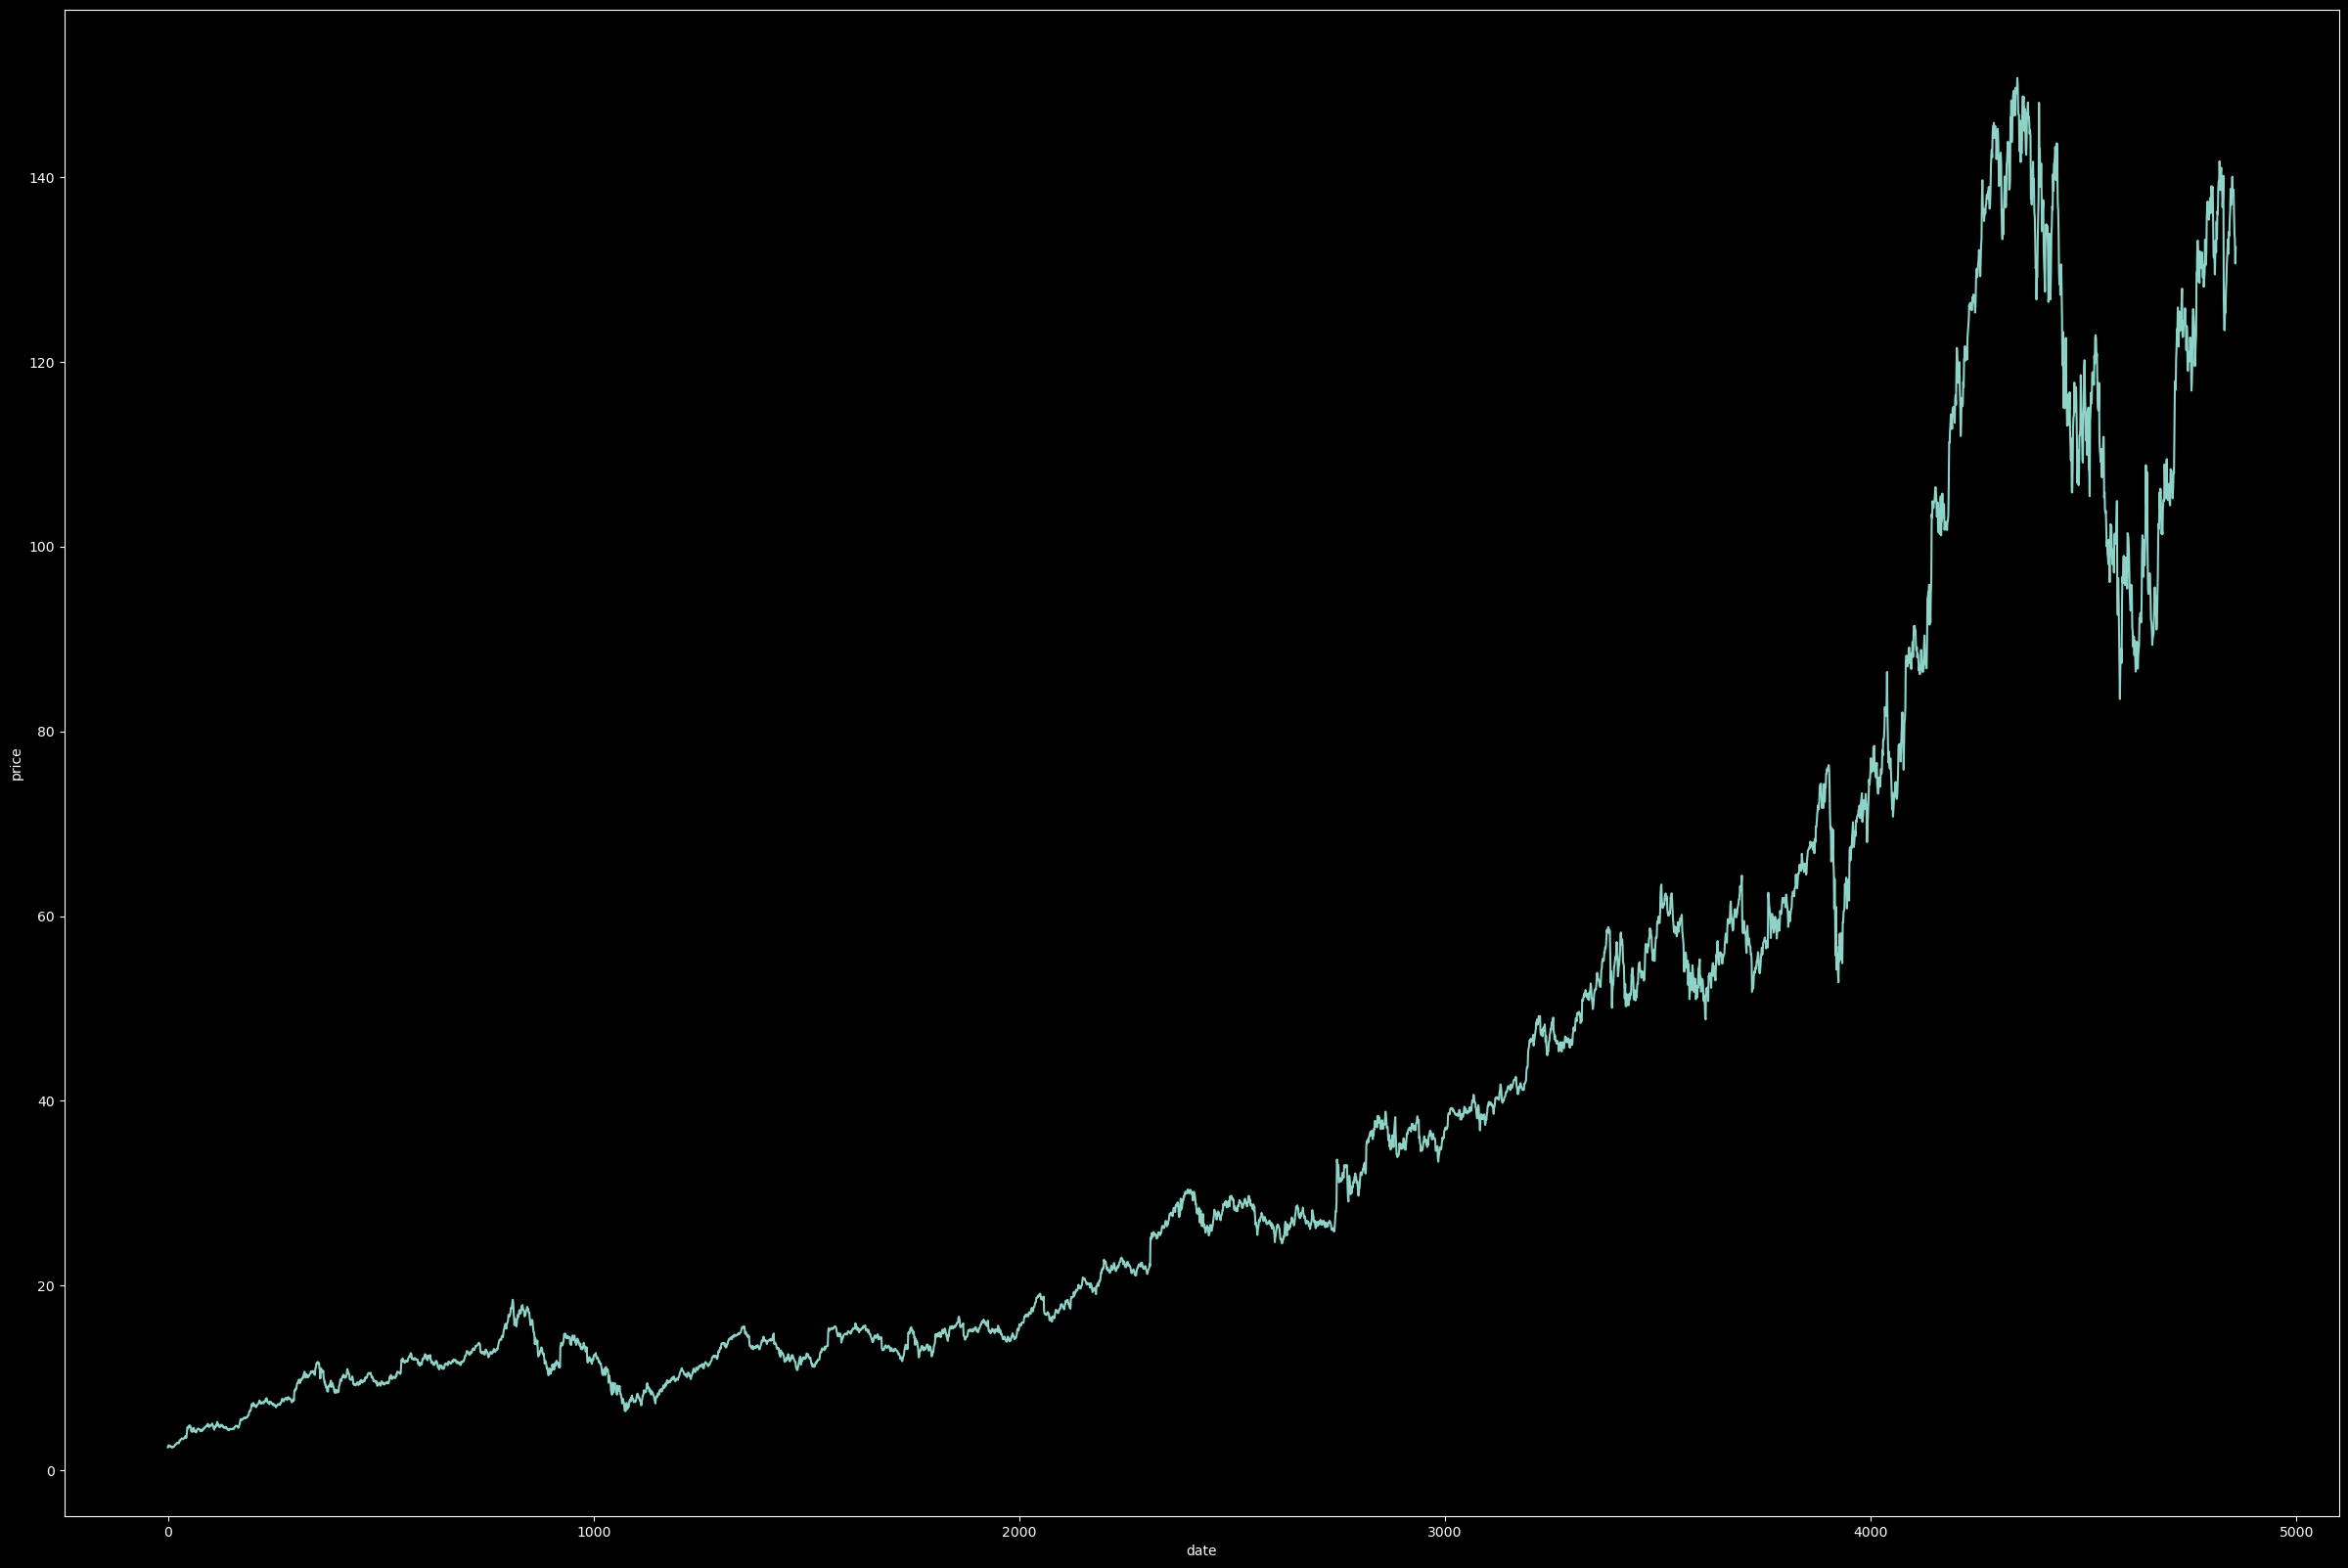

In [214]:
plt.figure(figsize=(30, 20))
plt.plot(df_goo["Close"])
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [215]:
dataset = df_goo[["Close"]].values
train_len = int(0.95 * len(dataset))
val_len = len(dataset) - train_len
print(train_len, val_len)

4615 243


In [216]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scale_dataset = scaler.fit_transform(dataset)
scale_dataset

array([[5.54588186e-05],
       [1.39474206e-03],
       [1.57790459e-03],
       ...,
       [8.82679683e-01],
       [8.64530737e-01],
       [8.76405091e-01]])

In [217]:
train_dataset = scale_dataset[0:train_len,:]

x_train = []
y_train = []
for i in range(60, train_len):
    x_train.append(train_dataset[i-60:i, 0])
    y_train.append(train_dataset[i, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scale_dataset[train_len-60:, :]
x_test = []
y_test = dataset[train_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [218]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape = (60, 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4555/4555 [==============================] - 79s 17ms/step - loss: 9.5190e-04
Epoch 2/5
4555/4555 [==============================] - 83s 18ms/step - loss: 5.6999e-04
Epoch 3/5
4555/4555 [==============================] - 85s 19ms/step - loss: 3.1632e-04
Epoch 4/5
4555/4555 [==============================] - 84s 19ms/step - loss: 2.1385e-04
Epoch 5/5
4555/4555 [==============================] - 86s 19ms/step - loss: 2.2678e-04


In [219]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
mse = np.mean((predictions - y_test)**2)
mse

8/8 [==============================] - 1s 19ms/step


23.127323673331073

In [220]:
print(predictions)

[[ 89.43739 ]
 [ 89.14517 ]
 [ 87.503685]
 [ 87.91223 ]
 [ 88.41029 ]
 [ 86.60459 ]
 [ 87.98778 ]
 [ 86.21284 ]
 [ 84.890976]
 [ 87.04992 ]
 [ 86.765755]
 [ 87.638084]
 [ 86.69648 ]
 [ 84.94293 ]
 [ 86.14378 ]
 [ 86.64927 ]
 [ 87.04561 ]
 [ 89.75221 ]
 [ 89.39272 ]
 [ 90.23202 ]
 [ 89.6217  ]
 [ 89.295334]
 [ 91.205505]
 [ 96.02295 ]
 [ 97.70101 ]
 [ 95.969376]
 [ 93.84582 ]
 [ 96.069756]
 [ 97.405   ]
 [ 94.99099 ]
 [ 96.88809 ]
 [ 98.25949 ]
 [104.98491 ]
 [101.55121 ]
 [100.297356]
 [104.42921 ]
 [ 97.02626 ]
 [ 93.337326]
 [ 92.79128 ]
 [ 92.92757 ]
 [ 92.95654 ]
 [ 94.96031 ]
 [ 93.74912 ]
 [ 92.72792 ]
 [ 90.3953  ]
 [ 90.12437 ]
 [ 89.37028 ]
 [ 87.787224]
 [ 88.42298 ]
 [ 88.52433 ]
 [ 88.679214]
 [ 90.245636]
 [ 91.704346]
 [ 93.0501  ]
 [ 91.72462 ]
 [ 92.15589 ]
 [ 90.297195]
 [ 88.84002 ]
 [ 89.413124]
 [ 91.727425]
 [ 93.796394]
 [ 97.89377 ]
 [ 99.06975 ]
 [ 98.62256 ]
 [102.177734]
 [100.564415]
 [102.56001 ]
 [102.31285 ]
 [ 99.72412 ]
 [ 98.36429 ]
 [ 98.92922 ]
 [ 98.

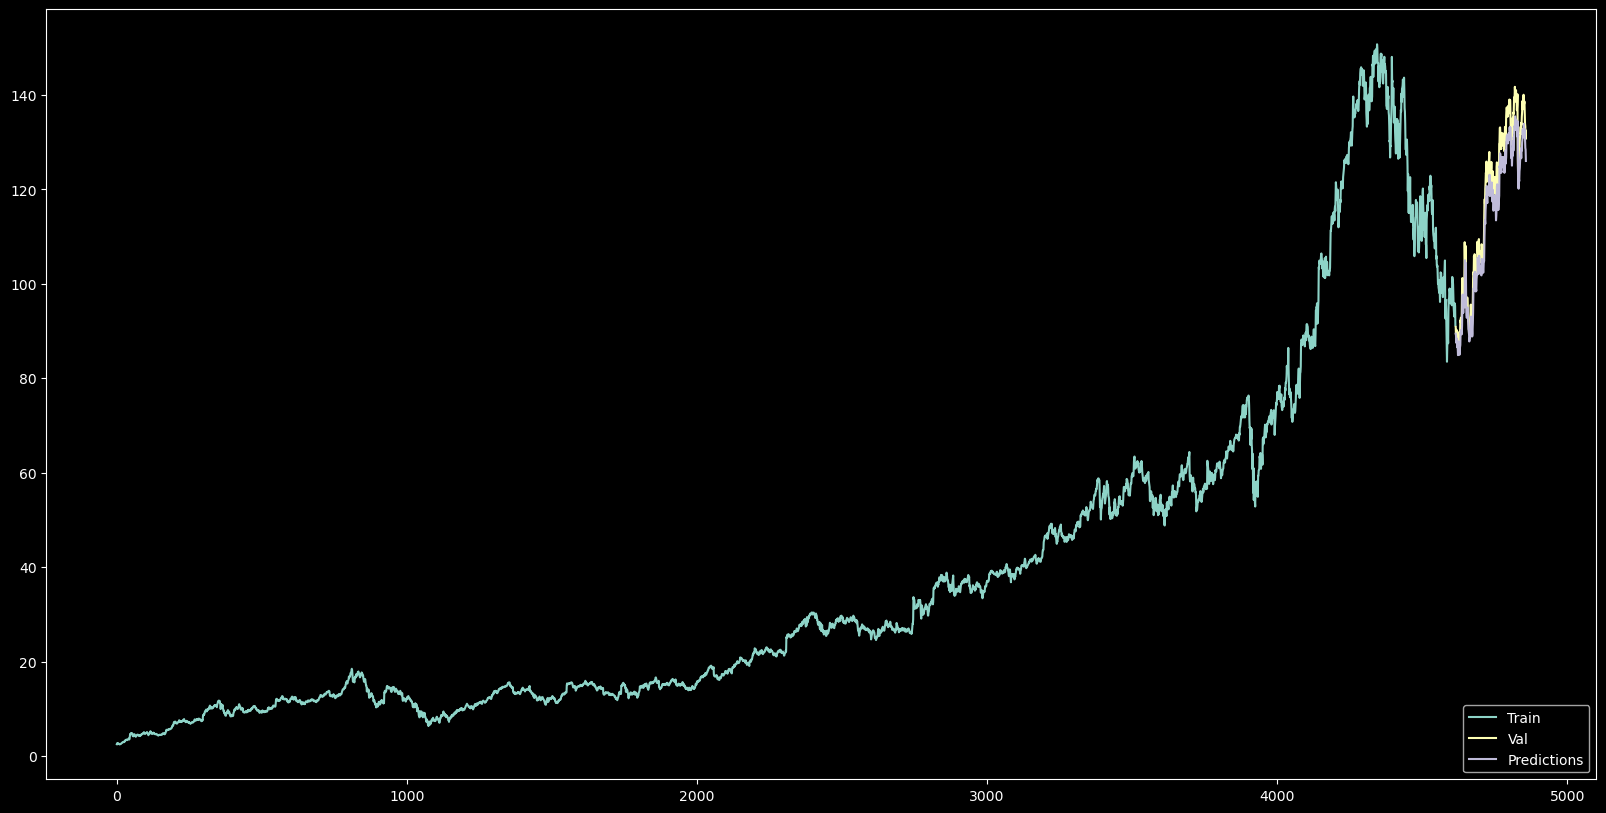

In [221]:
train = df_goo[["Close"]][:train_len]
test = df_goo[["Close"]][train_len:]
test['Predictions'] = predictions
plt.figure(figsize=(20, 10))
plt.plot(train["Close"])
plt.plot(test[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

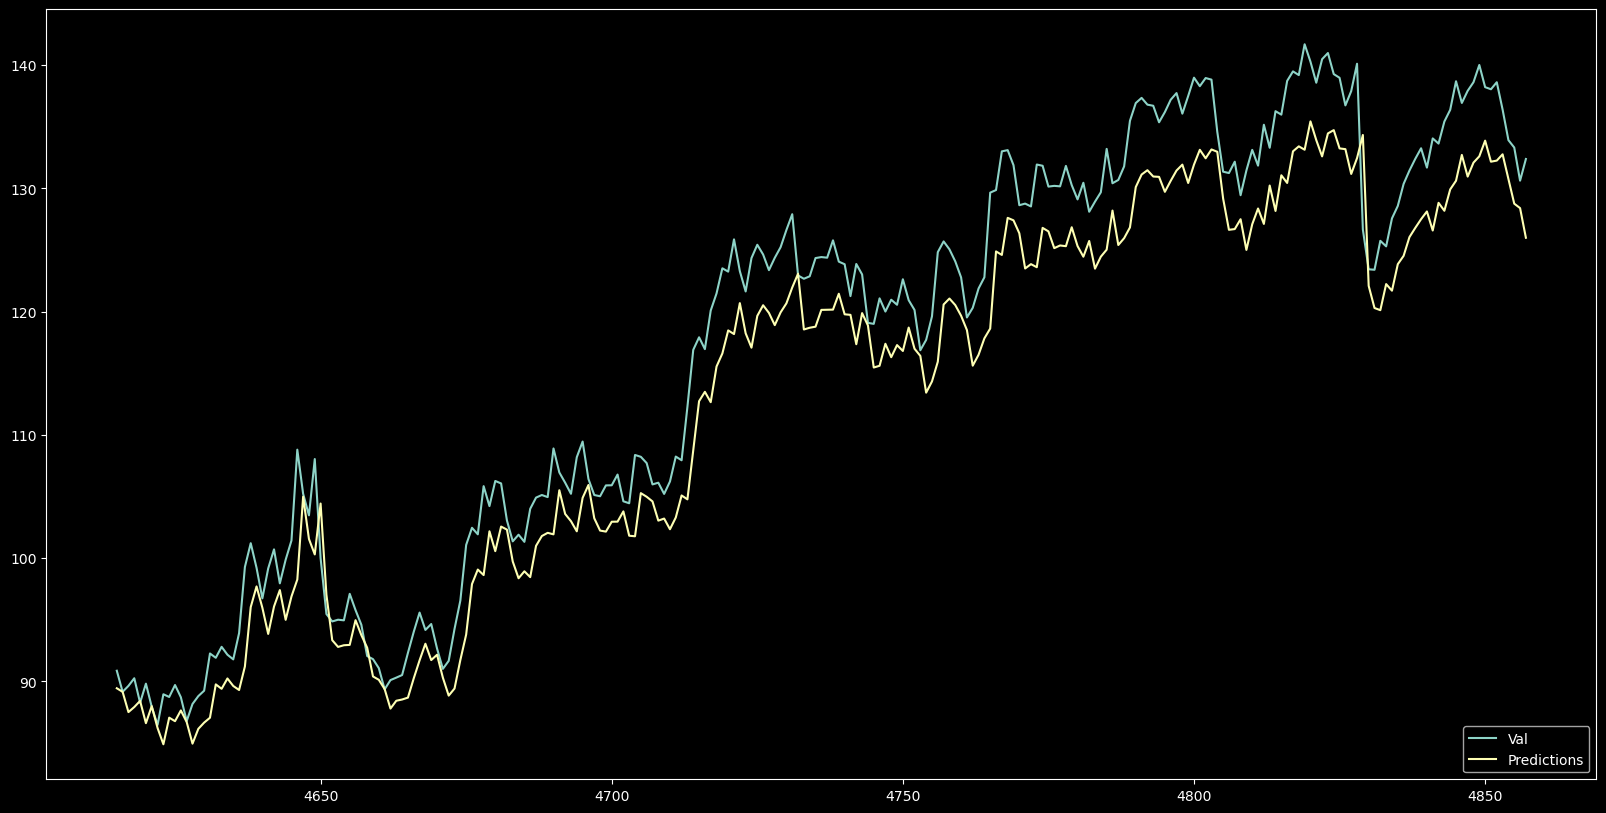

In [222]:
test = df_goo[["Close"]][train_len:]
test['Predictions'] = predictions
plt.figure(figsize=(20, 10))
plt.plot(test[["Close", "Predictions"]])
plt.legend(["Val", "Predictions"], loc="lower right")
plt.show()

In [223]:
test

,Close,Predictions
4615,90.860001,89.437393
4616,89.150002,89.145172
4617,89.629997,87.503685
4618,90.250000,87.912231
4619,88.260002,88.410294
...,...,...
4853,136.399994,132.771042
4854,133.919998,130.752655
4855,133.320007,128.764648
4856,130.630005,128.404556


Profit per stock if behave perfectly

In [234]:
predicted_profit = 0
actual_profit = 0
price_pred = np.array(test[["Predictions"]])
price_pred = np.reshape(price_pred, (price_pred.shape[0]))
for i in range(1, len(price_pred)):
    if (price_pred[i-1] < price_pred[i]):
        predicted_profit += (price_pred[i] - price_pred[i-1])
print(predicted_profit)
price = np.array(test[["Close"]])
price = np.reshape(price, (price.shape[0]))
for i in range(1, len(price)):
    if (price[i-1] < price[i]):
        actual_profit += (price[i] - price[i-1])
print(actual_profit)

197.7108917236328
220.30002999999994
